In [6]:
import pandas as pd
from plotnine import *

%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [7]:
sold_homes = pd.read_parquet("../data/alberta_sold_properties_Jan2020_Jul2022.parquet", engine="pyarrow")

In [8]:
sold_homes = sold_homes.reset_index(drop=True)

In [9]:
sold_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136102 entries, 0 to 136101
Data columns (total 69 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   id                                               136102 non-null  object 
 1   attributes_created_at                            136102 non-null  object 
 2   attributes_updated_at                            136102 non-null  object 
 3   attributes_listed_at                             136102 non-null  object 
 4   attributes_mls                                   136102 non-null  object 
 5   attributes_street                                136097 non-null  object 
 6   attributes_address                               136099 non-null  object 
 7   attributes_city                                  136102 non-null  object 
 8   attributes_state                                 136102 non-null  object 
 9   attributes_zip 

In [11]:
sold_homes.head()

,id,attributes_created_at,attributes_updated_at,attributes_listed_at,attributes_mls,attributes_street,attributes_address,attributes_city,attributes_state,attributes_zip,attributes_neighborhood,attributes_area,attributes_county,attributes_price,attributes_status,attributes_type,attributes_description,attributes_is_for_rent,attributes_is_for_sale,attributes_bedrooms,attributes_bathrooms,attributes_half_bathrooms,attributes_square,attributes_lot_square,attributes_broker,attributes_agent,attributes_year,attributes_virtual_tour,attributes_images_total,attributes_garages_total,attributes_parking_total,attributes_style,attributes_location_lon,attributes_location_lat,attributes_price_reduced_at,attributes_schools,attributes_city_label,attributes_rating,attributes_ismanuallyrated,attributes_is_active,attributes_mls_neighborhood,attributes_tax_amount,attributes_hoa_dues,status_data_text,status_data_color,buyeragent_data_id,buyeragent_data_name,buyeragent_data_title,buyeragent_data_email,buyeragent_data_phone,buyeragent_data_picture,buyeragent_data_animatedpicture,buyeragent_data_site,buyeragent_data_signature,buyeragent_data_office,buyeragent_data_isvisibleoncs,buyeragent_data_reviews_data,meta_data_is_favourite,meta_data_is_favorited_by,meta_data_url,meta_data_pricetrend,legaldisclaimer_data_legaldisclaimer_properties,legaldisclaimer_data_legaldisclaimer_property,source_data_type,source_data_name,source_data_title,source_data_displaymlsinfo,source_data_legaldisclaimer,source_data_hidestatuses
0,61612573,2022-07-07T09:21:09-04:00,2022-07-07T10:12:05-04:00,2022-07-07T00:00:00-04:00,A1237140,Discovery Heights SW,10 Discovery Heights SW,Calgary,AB,T3H 4Y6,Discovery Ridge,None,Calgary,514900.0,Sold,Home,"STEPS TO GRIFFITH WOODS PARK, PATHWAYS and PLA...",False,True,2.0,3.0,1.0,1471.00,2178.0,None,,2000.0,None,32,2.0,None,None,-114.196285,51.011659,None,None,"Calgary, AB",High Price,False,True,Discovery Ridge,0,0,SOLD - 07/07/2022,#ef4041,4661,Shane Strebchuk,REALTOR®,Shane@AlbertaRE.com,+15878990881,/media/images/WLUVfLl1ltaFRLJZ4w7zVNDBcMrMxGQ1...,,shane.albertare.com,"<p style=""margin: 0; line-height: inherit;"">Si...",+15878990881,True,[{'body': 'Shane Strebchuk successfully naviga...,False,[],/homedetails/61612573-10-discovery-heights-sw-...,NaN,Data is supplied by Pillar 9™ MLS® System. Pil...,Data is supplied by Pillar 9™ MLS® System. Pil...,RETS,CREBVOWTester,CREBVOW,False,None,[Sold]
1,61607269,2022-07-06T20:57:54-04:00,2022-07-06T20:57:54-04:00,2022-07-01T00:00:00-04:00,A1233356,Evergreen Circle SW,208 Evergreen Circle SW,Calgary,AB,T2Y 0B9,Evergreen,None,Calgary,1299800.0,Sold,Home,Welcome to this incredible custom home in the ...,False,True,6.0,4.0,1.0,2831.00,6534.0,None,Cstarnra,2008.0,None,46,3.0,None,None,-114.106600,50.919063,None,None,"Calgary, AB",Fair Deal,False,True,Evergreen,0,0,SOLD - 07/06/2022,#ef4041,4661,Shane Strebchuk,REALTOR®,Shane@AlbertaRE.com,+15878990881,/media/images/WLUVfLl1ltaFRLJZ4w7zVNDBcMrMxGQ1...,,shane.albertare.com,"<p style=""margin: 0; line-height: inherit;"">Si...",+15878990881,True,[{'body': 'Shane Strebchuk successfully naviga...,False,[],/homedetails/61607269-208-evergreen-circle-sw-...,NaN,Data is supplied by Pillar 9™ MLS® System. Pil...,Data is supplied by Pillar 9™ MLS® System. Pil...,RETS,CREBVOWTester,CREBVOW,False,None,[Sold]
2,61606753,2022-07-06T20:16:59-04:00,2022-07-06T20:16:59-04:00,2022-05-20T00:00:00-04:00,A1221183,Twp Road 462,"406, 55061 Twp Road 462",Rural Wetaskiwin No. 10,AB,T0C 0T0,None,None,"Wetaskiwin No. 10, County of",170000.0,Sold,Home,Well built cabin on .5 acre lot in Evergreen E...,False,True,2.0,2.0,1.0,993.52,21780.0,None,,2008.0,None,21,NaN,None,None,-114.721351,52.955548,None,None,"Rural Wetaskiwin No. 10, AB",Great Deal,False,True,None,0,0,SOLD - 07/06/2022,#ef4041,4661,Shane Strebchuk,REALTOR®,Shane@AlbertaRE.com,+15878990881,/media/images/WLUVfLl1ltaFRLJZ4w7zVNDBcMrMxGQ1...,,shane.albertare.com,"<p style=""margin: 0; line-height: inherit;"">Si...",+158789908

In [36]:
attributes[cols].dtypes

mls                  object
created_at           object
listed_at            object
updated_at           object
price               float64
square              float64
address              object
year                float64
bathrooms           float64
bedrooms            float64
city                 object
city_label           object
county               object
state                object
garages_total       float64
half_bathrooms      float64
price_reduced_at     object
lot_square          float64
zip                  object
location_lat        float64
location_lon        float64
mls_neighborhood     object
neighborhood         object
parking_total        object
status               object
street               object
dtype: object

/Users/zar/Envs/mlops-farmcamp-m-Cy2zEE-python/lib/python3.9/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_point : Removed 45 rows containing missing values.


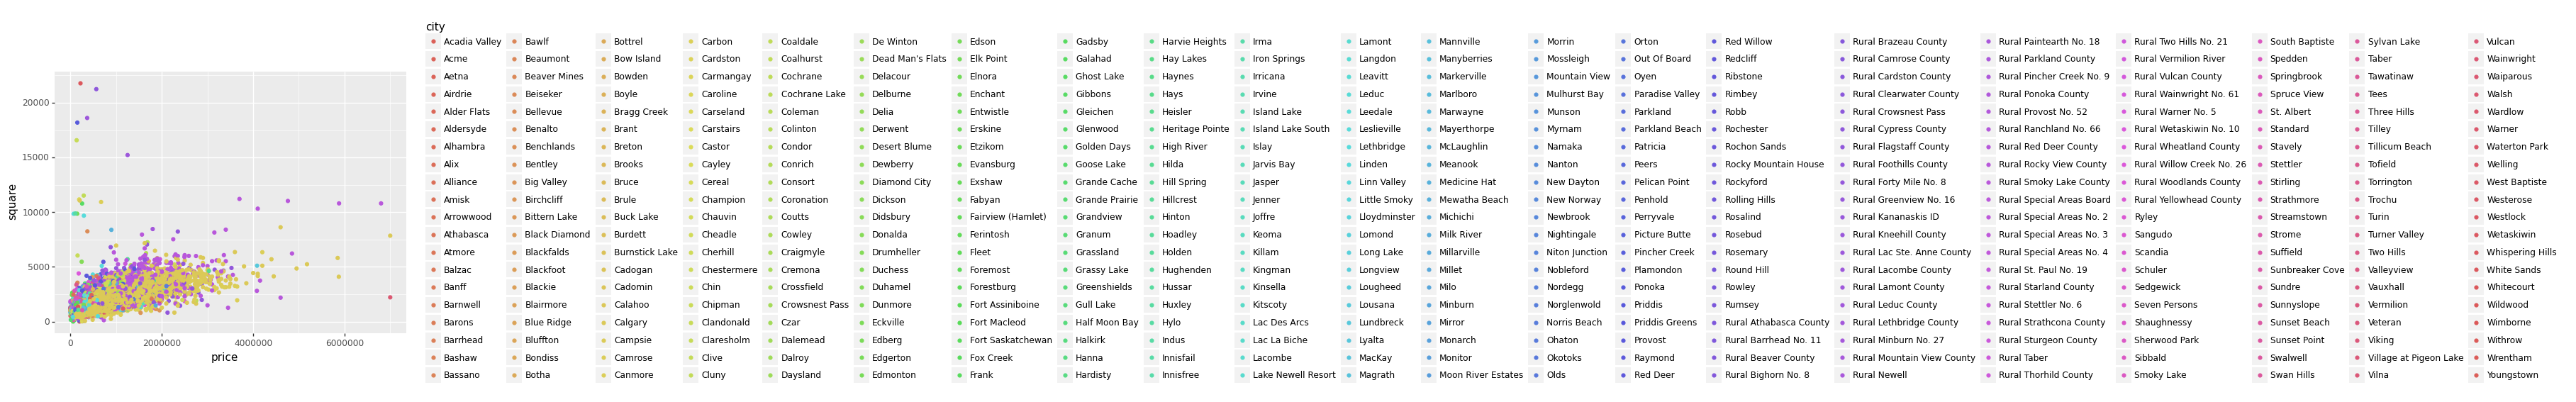

<ggplot: (376844773)>

In [41]:
(ggplot(attributes[cols], aes('price', 'square', color="city"))
 + geom_point())

In [56]:
pd.to_datetime(attributes.created_at).day

AttributeError: 'Series' object has no attribute 'day'

In [52]:
def tweak_properties(properties):
    cols = ["mls", "created_at", "listed_at", "updated_at", "price", "square", "address", "year", "bathrooms", "bedrooms",
        "city", "city_label", "county", "state", "garages_total", "half_bathrooms", "price_reduced_at",
         "lot_square", "zip", "location_lat", "location_lon", "mls_neighborhood", "neighborhood", "parking_total", "status", "street"]
    
    return (properties[cols]
            .assign(created_at=pd.to_datetime(properties.created_at),
                    created_on=pd.to_datetime(properties.created_at)
                    
                    )
            
            )

In [53]:
tweak_properties(attributes)

AttributeError: Can only use .dt accessor with datetimelike values

In [48]:
attributes[cols].sort_values(by="price", ascending=False).head(100)

,mls,created_at,listed_at,updated_at,price,square,address,year,bathrooms,bedrooms,city,city_label,county,state,garages_total,half_bathrooms,price_reduced_at,lot_square,zip,location_lat,location_lon,mls_neighborhood,neighborhood,parking_total,status,street
57938,C4272030,2021-06-11T18:01:25-04:00,2019-10-15T00:00:00-04:00,2022-01-01T07:02:42-05:00,7000000.00,2214.00,73195 Highway 40,1990.0,4.0,3.0,Waiparous,"Waiparous, AB","Bighorn No. 8, M.D. of",AB,NaN,1.0,None,43516875.6,T4C 0C4,51.280713,-114.937067,None,None,None,Sold,Highway 40
26373,A1176575,2022-02-04T02:13:06-05:00,2022-02-03T00:00:00-05:00,2022-05-01T04:48:34-04:00,7000000.00,7850.00,925 Durham Avenue SW,1910.0,6.0,6.0,Calgary,"Calgary, AB",Calgary,AB,5.0,1.0,None,32670.0,T2T 0P8,51.033872,-114.083844,Upper Mount Royal,Upper Mount Royal,None,Sold,Durham Avenue SW
31805,A1126508,2021-12-22T21:23:33-05:00,2021-07-12T00:00:00-04:00,2022-05-01T04:51:15-04:00,6800000.00,10804.00,25130 Escarpment Ridge View,2008.0,14.0,10.0,Rural Rocky View County,"Rural Rocky View County, AB",Rocky View County,AB,6.0,4.0,2022-02-23T13:54:29-05:00,114127.2,T3Z 3M7,51.059440,-114.269654,Escarpment Estates,Escarpment Estates,None,Sold,Escarpment Ridge View
83351,A1037570,2020-12-15T22:56:08-05:00,2020-10-06T00:00:00-04:00,2022-01-01T06:50:15-05:00,5880000.00,10803.73,25130 ESCARPMENT RIDGE View,2008.0,14.0,10.0,Rural Rocky View County,"Rural Rocky View County, AB",Rocky View County,AB,NaN,4.0,None,114127.2,T3Z 3M7,51.059440,-114.269654,None,None,None,Sold,ESCARPMENT RIDGE View
61087,A1061093,2021-05-26T12:43:19-04:00,2021-01-18T00:00:00-05:00,2022-01-01T07:04:31-05:00,5875000.00,4095.00,135 26 Avenue SW #910,2015.0,4.0,3.0,Calgary,"Calgary, AB",Calgary,AB,3.0,1.0,None,NaN,T2S 0M2,51.029280,-114.065863,Mission,Mission,None,Sold,26 Avenue SW
27930,A1163547,2022-01-25T17:10:15-05:00,2021-11-26T00:00:00-05:00,2022-05-31T20:01:16-04:00,5850000.00,5813.20,860 Hillcrest Avenue SW,2021.0,8.0,6.0,Calgary,"Calgary, AB",Calgary,AB,5.0,2.0,2022-05-31T20:01:16-04:00,13939.2,T2T 0Y9,51.031468,-114.082769,Upper Mount Royal,Upper Mount Royal,None,Sold,Hillcrest Avenue SW
44160,A1135789,2021-09-17T10:55:41-04:00,2021-08-07T00:00:00-04:00,2022-06-09T09:11:16-04:00,5178400.00,5242.00,2906 Marquette Street SW,2009.0,7.0,5.0,Calgary,"Calgary, AB",Calgary,AB,5.0,2.0,None,9583.2,T2T 3E3,51.027794,-114.084212,Upper Mount Royal,Upper Mount Royal,None,Sold,Marquette Street SW
3073,A1202518,2022-06-01T01:44:36-04:00,2022-05-31T00:00:00-04:00,2022-06-01T03:05:10-04:00,4950000.00,4852.00,4216 Britannia Drive SW,2016.0,7.0,4.0,Calgary,"Calgary, AB",Calgary,AB,4.0,2.0,None,13068.0,T2S 1J3,51.014922,-114.080720,Britannia,Britannia,None,Sold,Britannia Drive SW
20918,A1178485,2022-03-02T00:00:58-05:00,2022-02-04T00:00:00-05:00,2022-05-01T04:49:39-04:00,4850000.00,6221.00,51123 Township Road 234,2016.0,5.0,4.0,Rural Rocky View County,"Rural Rocky View County, AB",Rocky View County,AB,14.0,NaN,2022-03-14T21:09:52-04:00,6969600.0,T0L 0K0,50.975874,-114.589027,None,None,None,Sold,Township Road 234
38369,A1124720,2021-11-01T11:33:03-04:00,2021-06-28T00:00:00-04:00,2022-06-09T09:12:45-04:00,4760000.00,11026.00,251201 Welland Drive NW,2004.0,7.0,5.0,Rural Rocky View County,"Rural Rocky View County, AB",Rocky View County,AB,6.0,3.0,None,130244.4,T3R 1L3,51.209191,-114.299398,Bearspaw_Calg,Bearspaw_Calg,None,Sold,Welland Drive NW
